In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy.polynomial.polynomial as poly

q2_part_a

In [53]:
datas = pd.read_csv("C:/Users/acer/Desktop/ML_Hw1/Data.csv")

In [54]:
X = datas.drop(columns=['Y']).to_numpy()
Y = datas['Y'].to_numpy().reshape(-1, 1)

X_bias = np.ones((X.shape[0],1))
Xnew = np.hstack((X,X_bias))


In [55]:
train, test = train_test_split(datas, test_size=0.2, random_state=10)
train.shape

(40, 2)

In [56]:
test.shape

(10, 2)

q2_part_b

In [57]:
train , cv = train_test_split(train, test_size=0.2, random_state=10)
cv.shape

(8, 2)

In [58]:
test.shape

(10, 2)

In [59]:
train.shape

(32, 2)

In [60]:
X_cv = cv.drop(columns=['Y']).to_numpy()
Y_cv = cv['Y'].to_numpy().reshape(-1, 1)

X_bias = np.ones((X_cv.shape[0],1))
X_cv = np.hstack((X_cv,X_bias))
X_cv

array([[ 0.61236076,  1.        ],
       [-0.35478369,  1.        ],
       [ 0.12212288,  1.        ],
       [ 0.96162536,  1.        ],
       [ 0.04106305,  1.        ],
       [ 0.80559867,  1.        ],
       [ 0.08048819,  1.        ],
       [-0.02904514,  1.        ]])

In [61]:
X_test = test.drop(columns=['Y']).to_numpy()
Y_test = test['Y'].to_numpy().reshape(-1, 1)

X_bias = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_test,X_bias))
X_test

array([[ 0.49043282,  1.        ],
       [-0.07134597,  1.        ],
       [ 0.76129033,  1.        ],
       [ 0.68350555,  1.        ],
       [ 0.88367018,  1.        ],
       [-0.18999069,  1.        ],
       [-0.87622084,  1.        ],
       [ 0.20122934,  1.        ],
       [-0.71568049,  1.        ],
       [-0.75767175,  1.        ]])

In [62]:
X_train = train.drop(columns=['Y']).to_numpy()
Y_train = train['Y'].to_numpy().reshape(-1, 1)

X_bias = np.ones((X_train.shape[0],1))
X_train = np.hstack((X_train,X_bias))
X_train

array([[-0.67504041,  1.        ],
       [ 0.36864846,  1.        ],
       [-0.14789673,  1.        ],
       [ 0.40394395,  1.        ],
       [ 0.29197362,  1.        ],
       [-0.83816555,  1.        ],
       [-0.43965765,  1.        ],
       [ 0.01118258,  1.        ],
       [-0.91999857,  1.        ],
       [-0.23752373,  1.        ],
       [-0.51744435,  1.        ],
       [-0.39161916,  1.        ],
       [ 0.32666457,  1.        ],
       [-0.46902353,  1.        ],
       [-0.31301638,  1.        ],
       [-0.59476007,  1.        ],
       [ 0.64935207,  1.        ],
       [ 0.72986599,  1.        ],
       [-0.95099594,  1.        ],
       [ 0.44858126,  1.        ],
       [-0.63326479,  1.        ],
       [-0.27824516,  1.        ],
       [ 0.5202286 ,  1.        ],
       [-0.1160822 ,  1.        ],
       [ 0.17097678,  1.        ],
       [ 0.85135744,  1.        ],
       [-0.55143476,  1.        ],
       [ 0.92359719,  1.        ],
       [ 0.5693768 ,

In [63]:
def calculate_cost_func(X , Y , w):
    
    f_model = np.dot(X, w)
    cost = np.sum((f_model-Y)**2)
    
    final_cost = cost/(2*Y.shape[0])
    
    return final_cost

In [64]:
def clcuate_batch_GD(X , Y, w, alpha, iteration):
    cost_history=[]
    
    for i in range(iteration):
        f_model = np.dot(X , w)
        w = w - (alpha * (np.dot((f_model-Y).T , X).T)/Y.shape[0] )
        cost = calculate_cost_func(X , Y , w)
        cost_history.append(cost)
        
    return w , cost_history

In [65]:
cost_alpha=[]
w=np.ones([X_train.shape[1], 1])
w , batch_cost = clcuate_batch_GD(X_train , Y_train, w, 0.001, 1000)

final_w_alpha_1 = w
cost_alpha_1 = calculate_cost_func(X_cv , Y_cv , w)
cost_alpha.append(cost_alpha_1)
print(cost_alpha_1)

4.946047727828189


In [66]:
w=np.ones([X_train.shape[1], 1])
w , batch_cost = clcuate_batch_GD(X_train , Y_train, w, 0.01, 1000)

cost_alpha_2 = calculate_cost_func(X_cv , Y_cv , w)
cost_alpha.append(cost_alpha_2)
print(cost_alpha_2)

0.9834694902965112


In [67]:
w=np.ones([X_train.shape[1], 1])
w , batch_cost = clcuate_batch_GD(X_train , Y_train, w, 0.0001, 1000)

cost_alpha_3 = calculate_cost_func(X_cv , Y_cv , w)
cost_alpha.append(cost_alpha_3)
print(cost_alpha_3)

23.16231260933943


In [68]:
w=np.ones([X_train.shape[1], 1])
w , batch_cost = clcuate_batch_GD(X_train , Y_train, w, 1e-8, 1000)

final_w_alpha_4 = w
cost_alpha_4 = calculate_cost_func(X_cv , Y_cv , w)
cost_alpha.append(cost_alpha_4)
print(cost_alpha_4)

27.977762085734426


In [69]:
w=np.ones([X_train.shape[1], 1])
w , batch_cost = clcuate_batch_GD(X_train , Y_train, w, 0.05, 1000)

#final_w = w
cost_alpha_5 = calculate_cost_func(X_cv , Y_cv , w)
cost_alpha.append(cost_alpha_5)
print(cost_alpha_5)

0.9787329934942215


In [82]:
from datetime import datetime 
start_time = datetime.now() 

w=np.ones([X_train.shape[1], 1])
w , batch_cost = clcuate_batch_GD(X_train , Y_train, w, 0.1, 1000)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

final_w = w
cost_alpha_6 = calculate_cost_func(X_cv , Y_cv , w)
cost_alpha.append(cost_alpha_6)
print(cost_alpha_6)

Time elapsed (hh:mm:ss.ms) 0:00:00.017916
0.9787329798003808


Text(0, 0.5, 'Cost')

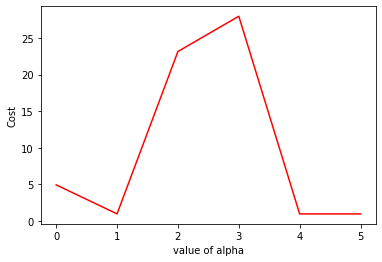

In [71]:
plt.plot(range(6), cost_alpha, c='red') 

plt.xlabel("value of alpha")
plt.ylabel("Cost")

بنظر میرسد زمانی که نرخ یادگیری برابر 0.1 باشد کمترین خطا را خوهیم داشت روی مجموعه ارزیابی. هرچند زمانی که نرخ برابر 0.05 باشد نیز خطا بسیار نزدیک خواهد شد ولی نرخ یادگیری 0.1 در نهایت انتخاب بهتری میباشد

##alpha = 0.1

[-0.67504041  0.36864846 -0.14789673  0.40394395  0.29197362 -0.83816555
 -0.43965765  0.01118258 -0.91999857 -0.23752373 -0.51744435 -0.39161916
  0.32666457 -0.46902353 -0.31301638 -0.59476007  0.64935207  0.72986599
 -0.95099594  0.44858126 -0.63326479 -0.27824516  0.5202286  -0.1160822
  0.17097678  0.85135744 -0.55143476  0.92359719  0.5693768  -0.79884577
 -0.99478723  0.24526385]


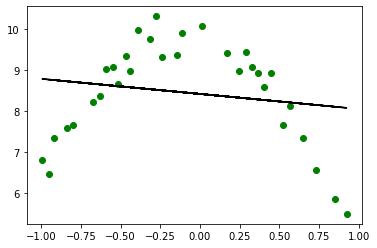

In [72]:
Y_model = np.dot(X_train , final_w)

X_train_sec = X_train[:,0]
print(X_train_sec)
plt.scatter(X_train_sec, Y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

##alpha = 0.001

[-0.67504041  0.36864846 -0.14789673  0.40394395  0.29197362 -0.83816555
 -0.43965765  0.01118258 -0.91999857 -0.23752373 -0.51744435 -0.39161916
  0.32666457 -0.46902353 -0.31301638 -0.59476007  0.64935207  0.72986599
 -0.95099594  0.44858126 -0.63326479 -0.27824516  0.5202286  -0.1160822
  0.17097678  0.85135744 -0.55143476  0.92359719  0.5693768  -0.79884577
 -0.99478723  0.24526385]


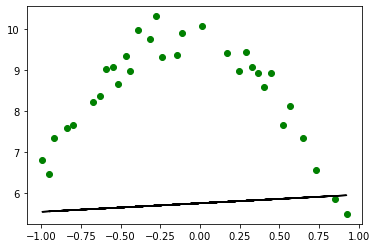

In [73]:
Y_model = np.dot(X_train , final_w_alpha_1)

X_train_sec = X_train[:,0]
print(X_train_sec)
plt.scatter(X_train_sec, Y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

In [74]:
final_train_cost = calculate_cost_func(X_train , Y_train , final_w)
final_train_cost

0.7465436219668953

In [75]:
Y_model_test = np.dot(X_test , final_w)
final_test_cost = calculate_cost_func(X_test , Y_test , final_w)
final_test_cost

0.6853751594616078

q2_part_C

In [76]:
def cal_normal_Equation(X, Y):
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    return w

In [79]:
final_normal_w = cal_normal_Equation(X_train, Y_train)

Wall time: 0 ns


Time elapsed (hh:mm:ss.ms) 0:00:00.000959
[-0.67504041  0.36864846 -0.14789673  0.40394395  0.29197362 -0.83816555
 -0.43965765  0.01118258 -0.91999857 -0.23752373 -0.51744435 -0.39161916
  0.32666457 -0.46902353 -0.31301638 -0.59476007  0.64935207  0.72986599
 -0.95099594  0.44858126 -0.63326479 -0.27824516  0.5202286  -0.1160822
  0.17097678  0.85135744 -0.55143476  0.92359719  0.5693768  -0.79884577
 -0.99478723  0.24526385]


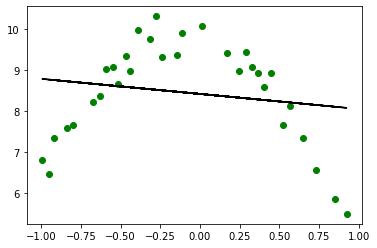

In [83]:
from datetime import datetime 
start_time = datetime.now() 
final_normal_w = cal_normal_Equation(X_train, Y_train)
Y_model_normal = np.dot(X_train , final_normal_w)

print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

X_train_sec = X_train[:,0]
print(X_train_sec)
plt.scatter(X_train_sec, Y_train,color='g')
plt.plot(X_train_sec, Y_model_normal,color='k')

In [29]:
final_train_cost_normal = calculate_cost_func(X_train , Y_train , final_normal_w)
final_train_cost_normal

0.746543621966895

In [30]:
Y_model_test = np.dot(X_test , final_normal_w)
final_test_cost_normal = calculate_cost_func(X_test , Y_test , final_normal_w)
final_test_cost_normal

0.685375159461605

q1_part_D

In [31]:
X_train_t5 = train.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_train.shape[0],1))
X1 = X_train_t5 ** 2
X2 = X_train_t5 ** 3
X3 = X_train_t5 ** 4
X4 = X_train_t5 ** 5

X_train_t5 = np.hstack((X_train_t5,X1))
X_train_t5 = np.column_stack((X_train_t5,X2))
X_train_t5 = np.column_stack((X_train_t5,X3))
X_train_t5 = np.column_stack((X_train_t5,X4))
X_train_t5 = np.column_stack((X_train_t5,X_bias))
print(X_train_t5)

[[-6.75040407e-01  4.55679551e-01 -3.07602110e-01  2.07643853e-01
  -1.40167991e-01  1.00000000e+00]
 [ 3.68648464e-01  1.35901690e-01  5.00999493e-02  1.84692693e-02
   6.80866778e-03  1.00000000e+00]
 [-1.47896730e-01  2.18734427e-02 -3.23501066e-03  4.78447498e-04
  -7.07608204e-05  1.00000000e+00]
 [ 4.03943945e-01  1.63170711e-01  6.59118206e-02  2.66246808e-02
   1.07548786e-02  1.00000000e+00]
 [ 2.91973619e-01  8.52485942e-02  2.48903406e-02  7.26732281e-03
   2.12186654e-03  1.00000000e+00]
 [-8.38165551e-01  7.02521491e-01 -5.88829312e-01  4.93536445e-01
  -4.13665246e-01  1.00000000e+00]
 [-4.39657655e-01  1.93298854e-01 -8.49853207e-02  3.73644468e-02
  -1.64275651e-02  1.00000000e+00]
 [ 1.11825830e-02  1.25050163e-04  1.39838382e-06  1.56375432e-08
   1.74868124e-10  1.00000000e+00]
 [-9.19998570e-01  8.46397369e-01 -7.78684369e-01  7.16388506e-01
  -6.59076401e-01  1.00000000e+00]
 [-2.37523731e-01  5.64175228e-02 -1.34005005e-02  3.18293688e-03
  -7.56023043e-04  1.0000

In [32]:
X_test_t5 = test.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_test_t5.shape[0],1))
X1 = X_test_t5 ** 2
X2 = X_test_t5 ** 3
X3 = X_test_t5 ** 4
X4 = X_test_t5 ** 5

X_test_t5 = np.hstack((X_test_t5,X1))
X_test_t5 = np.column_stack((X_test_t5,X2))
X_test_t5 = np.column_stack((X_test_t5,X3))
X_test_t5 = np.column_stack((X_test_t5,X4))
X_test_t5 = np.column_stack((X_test_t5,X_bias))
print(X_test_t5)

[[ 4.90432821e-01  2.40524352e-01  1.17961036e-01  5.78519639e-02
   2.83725018e-02  1.00000000e+00]
 [-7.13459670e-02  5.09024701e-03 -3.63168595e-04  2.59106146e-05
  -1.84861785e-06  1.00000000e+00]
 [ 7.61290325e-01  5.79562959e-01  4.41215673e-01  3.35893223e-01
   2.55712261e-01  1.00000000e+00]
 [ 6.83505550e-01  4.67179837e-01  3.19320011e-01  2.18257000e-01
   1.49179871e-01  1.00000000e+00]
 [ 8.83670177e-01  7.80872982e-01  6.90034166e-01  6.09762614e-01
   5.38829037e-01  1.00000000e+00]
 [-1.89990693e-01  3.60964634e-02 -6.85799210e-03  1.30295467e-03
  -2.47549261e-04  1.00000000e+00]
 [-8.76220843e-01  7.67762966e-01 -6.72729913e-01  5.89459972e-01
  -5.16497113e-01  1.00000000e+00]
 [ 2.01229335e-01  4.04932453e-02  8.14842882e-03  1.63970291e-03
   3.29956327e-04  1.00000000e+00]
 [-7.15680491e-01  5.12198565e-01 -3.66570521e-01  2.62347370e-01
  -1.87756895e-01  1.00000000e+00]
 [-7.57671747e-01  5.74066476e-01 -4.34953950e-01  3.29552319e-01
  -2.49692481e-01  1.0000

In [33]:
final_normal_w_t5 = cal_normal_Equation(X_train_t5, Y_train)

final_train_cost_normal_t5 = calculate_cost_func(X_train_t5 , Y_train , final_normal_w_t5)
print(final_train_cost_normal_t5)

Y_model_test_t5 = np.dot(X_test_t5 , final_normal_w_t5)
final_test_cost_normal_t5 = calculate_cost_func(X_test_t5 , Y_test , final_normal_w_t5)
print(final_test_cost_normal_t5)

0.042057467833225365
0.04643669744813571


(32, 8)


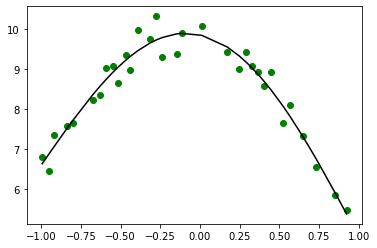

In [34]:
Y_model_normal = np.dot(X_train_t5 , final_normal_w_t5)

final_df_t5 = np.column_stack((X_train_t5,Y_model_normal))
final_df_t5 = np.column_stack((final_df_t5,Y_train))

final_df_t5 = final_df_t5[final_df_t5[:,0].astype(float).argsort()]

print(final_df_t5.shape)

X_train_sec= final_df_t5[:,0]
Y_model = final_df_t5[:,6]

y_train= final_df_t5[:,7]



plt.scatter(X_train_sec, y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

In [35]:
X_train_t7 = train.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_train.shape[0],1))
X1 = X_train_t7 ** 2
X2 = X_train_t7 ** 3
X3 = X_train_t7 ** 4
X4 = X_train_t7 ** 5
X5 = X_train_t7 ** 6
X6 = X_train_t7 ** 7

X_train_t7 = np.hstack((X_train_t7,X1))
X_train_t7 = np.column_stack((X_train_t7,X2))
X_train_t7 = np.column_stack((X_train_t7,X3))
X_train_t7 = np.column_stack((X_train_t7,X4))
X_train_t7 = np.column_stack((X_train_t7,X5))
X_train_t7 = np.column_stack((X_train_t7,X6))
X_train_t7 = np.column_stack((X_train_t7,X_bias))
print(X_train_t7)

[[-6.75040407e-01  4.55679551e-01 -3.07602110e-01  2.07643853e-01
  -1.40167991e-01  9.46190578e-02 -6.38716873e-02  1.00000000e+00]
 [ 3.68648464e-01  1.35901690e-01  5.00999493e-02  1.84692693e-02
   6.80866778e-03  2.51000492e-03  9.25309457e-04  1.00000000e+00]
 [-1.47896730e-01  2.18734427e-02 -3.23501066e-03  4.78447498e-04
  -7.07608204e-05  1.04652939e-05 -1.54778275e-06  1.00000000e+00]
 [ 4.03943945e-01  1.63170711e-01  6.59118206e-02  2.66246808e-02
   1.07548786e-02  4.34436809e-03  1.75488119e-03  1.00000000e+00]
 [ 2.91973619e-01  8.52485942e-02  2.48903406e-02  7.26732281e-03
   2.12186654e-03  6.19529053e-04  1.80886140e-04  1.00000000e+00]
 [-8.38165551e-01  7.02521491e-01 -5.88829312e-01  4.93536445e-01
  -4.13665246e-01  3.46719959e-01 -2.90608726e-01  1.00000000e+00]
 [-4.39657655e-01  1.93298854e-01 -8.49853207e-02  3.73644468e-02
  -1.64275651e-02  7.22250473e-03 -3.17542949e-03  1.00000000e+00]
 [ 1.11825830e-02  1.25050163e-04  1.39838382e-06  1.56375432e-08
   

In [36]:
X_test_t7 = test.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_test_t7.shape[0],1))
X1 = X_test_t7 ** 2
X2 = X_test_t7 ** 3
X3 = X_test_t7 ** 4
X4 = X_test_t7 ** 5
X5 = X_test_t7 ** 6
X6 = X_test_t7 ** 7

X_test_t7 = np.hstack((X_test_t7,X1))
X_test_t7 = np.column_stack((X_test_t7,X2))
X_test_t7 = np.column_stack((X_test_t7,X3))
X_test_t7 = np.column_stack((X_test_t7,X4))
X_test_t7 = np.column_stack((X_test_t7,X5))
X_test_t7 = np.column_stack((X_test_t7,X6))
X_test_t7 = np.column_stack((X_test_t7,X_bias))
print(X_test_t7)

[[ 4.90432821e-01  2.40524352e-01  1.17961036e-01  5.78519639e-02
   2.83725018e-02  1.39148061e-02  6.82427762e-03  1.00000000e+00]
 [-7.13459670e-02  5.09024701e-03 -3.63168595e-04  2.59106146e-05
  -1.84861785e-06  1.31891428e-07 -9.40992150e-09  1.00000000e+00]
 [ 7.61290325e-01  5.79562959e-01  4.41215673e-01  3.35893223e-01
   2.55712261e-01  1.94671270e-01  1.48201355e-01  1.00000000e+00]
 [ 6.83505550e-01  4.67179837e-01  3.19320011e-01  2.18257000e-01
   1.49179871e-01  1.01965270e-01  6.96938277e-02  1.00000000e+00]
 [ 8.83670177e-01  7.80872982e-01  6.90034166e-01  6.09762614e-01
   5.38829037e-01  4.76147150e-01  4.20757037e-01  1.00000000e+00]
 [-1.89990693e-01  3.60964634e-02 -6.85799210e-03  1.30295467e-03
  -2.47549261e-04  4.70320557e-05 -8.93565285e-06  1.00000000e+00]
 [-8.76220843e-01  7.67762966e-01 -6.72729913e-01  5.89459972e-01
  -5.16497113e-01  4.52565536e-01 -3.96547355e-01  1.00000000e+00]
 [ 2.01229335e-01  4.04932453e-02  8.14842882e-03  1.63970291e-03
   

In [37]:
final_normal_w_t7 = cal_normal_Equation(X_train_t7, Y_train)

final_train_cost_normal_t7 = calculate_cost_func(X_train_t7 , Y_train , final_normal_w_t7)
print(final_train_cost_normal_t7)

Y_model_test_t7 = np.dot(X_test_t7 , final_normal_w_t7)
final_test_cost_normal_t7 = calculate_cost_func(X_test_t7 , Y_test , final_normal_w_t7)
print(final_test_cost_normal_t7)

0.04048329892999203
0.05278765617934552


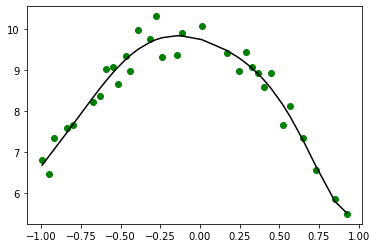

In [38]:
Y_model_normal = np.dot(X_train_t7 , final_normal_w_t7)

final_df_t7 = np.column_stack((X_train_t7,Y_model_normal))
final_df_t7 = np.column_stack((final_df_t7,Y_train))

final_df_t7 = final_df_t7[final_df_t7[:,0].astype(float).argsort()]

X_train_sec= final_df_t7[:,0]
Y_model = final_df_t7[:,8]

y_train= final_df_t7[:,9]



plt.scatter(X_train_sec, y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

In [39]:
X_train_t9 = train.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_train.shape[0],1))
X1 = X_train_t9 ** 2
X2 = X_train_t9 ** 3
X3 = X_train_t9 ** 4
X4 = X_train_t9 ** 5
X5 = X_train_t9 ** 6
X6 = X_train_t9 ** 7
X7 = X_train_t9 ** 8
X8 = X_train_t9 ** 9

X_train_t9 = np.hstack((X_train_t9,X1))
X_train_t9 = np.column_stack((X_train_t9,X2))
X_train_t9 = np.column_stack((X_train_t9,X3))
X_train_t9 = np.column_stack((X_train_t9,X4))
X_train_t9 = np.column_stack((X_train_t9,X5))
X_train_t9 = np.column_stack((X_train_t9,X6))
X_train_t9 = np.column_stack((X_train_t9,X7))
X_train_t9 = np.column_stack((X_train_t9,X8))
X_train_t9 = np.column_stack((X_train_t9,X_bias))
print(X_train_t9)

[[-6.75040407e-01  4.55679551e-01 -3.07602110e-01  2.07643853e-01
  -1.40167991e-01  9.46190578e-02 -6.38716873e-02  4.31159698e-02
  -2.91050218e-02  1.00000000e+00]
 [ 3.68648464e-01  1.35901690e-01  5.00999493e-02  1.84692693e-02
   6.80866778e-03  2.51000492e-03  9.25309457e-04  3.41113910e-04
   1.25751119e-04  1.00000000e+00]
 [-1.47896730e-01  2.18734427e-02 -3.23501066e-03  4.78447498e-04
  -7.07608204e-05  1.04652939e-05 -1.54778275e-06  2.28912008e-07
  -3.38553374e-08  1.00000000e+00]
 [ 4.03943945e-01  1.63170711e-01  6.59118206e-02  2.66246808e-02
   1.07548786e-02  4.34436809e-03  1.75488119e-03  7.08873629e-04
   2.86345210e-04  1.00000000e+00]
 [ 2.91973619e-01  8.52485942e-02  2.48903406e-02  7.26732281e-03
   2.12186654e-03  6.19529053e-04  1.80886140e-04  5.28139808e-05
   1.54202891e-05  1.00000000e+00]
 [-8.38165551e-01  7.02521491e-01 -5.88829312e-01  4.93536445e-01
  -4.13665246e-01  3.46719959e-01 -2.90608726e-01  2.43578223e-01
  -2.04158875e-01  1.00000000e+00

In [40]:
X_test_t9 = test.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_test_t9.shape[0],1))
X1 = X_test_t9 ** 2
X2 = X_test_t9 ** 3
X3 = X_test_t9 ** 4
X4 = X_test_t9 ** 5
X5 = X_test_t9 ** 6
X6 = X_test_t9 ** 7
X7 = X_test_t9 ** 8
X8 = X_test_t9 ** 9

X_test_t9 = np.hstack((X_test_t9,X1))
X_test_t9 = np.column_stack((X_test_t9,X2))
X_test_t9 = np.column_stack((X_test_t9,X3))
X_test_t9 = np.column_stack((X_test_t9,X4))
X_test_t9 = np.column_stack((X_test_t9,X5))
X_test_t9 = np.column_stack((X_test_t9,X6))
X_test_t9 = np.column_stack((X_test_t9,X7))
X_test_t9 = np.column_stack((X_test_t9,X8))
X_test_t9 = np.column_stack((X_test_t9,X_bias))
print(X_test_t9)

[[ 4.90432821e-01  2.40524352e-01  1.17961036e-01  5.78519639e-02
   2.83725018e-02  1.39148061e-02  6.82427762e-03  3.34684972e-03
   1.64140495e-03  1.00000000e+00]
 [-7.13459670e-02  5.09024701e-03 -3.63168595e-04  2.59106146e-05
  -1.84861785e-06  1.31891428e-07 -9.40992150e-09  6.71359949e-10
  -4.78988247e-11  1.00000000e+00]
 [ 7.61290325e-01  5.79562959e-01  4.41215673e-01  3.35893223e-01
   2.55712261e-01  1.94671270e-01  1.48201355e-01  1.12824258e-01
   8.58920157e-02  1.00000000e+00]
 [ 6.83505550e-01  4.67179837e-01  3.19320011e-01  2.18257000e-01
   1.49179871e-01  1.01965270e-01  6.96938277e-02  4.76361180e-02
   3.25595511e-02  1.00000000e+00]
 [ 8.83670177e-01  7.80872982e-01  6.90034166e-01  6.09762614e-01
   5.38829037e-01  4.76147150e-01  4.20757037e-01  3.71810445e-01
   3.28557802e-01  1.00000000e+00]
 [-1.89990693e-01  3.60964634e-02 -6.85799210e-03  1.30295467e-03
  -2.47549261e-04  4.70320557e-05 -8.93565285e-06  1.69769088e-06
  -3.22545466e-07  1.00000000e+00

In [41]:
final_normal_w_t9 = cal_normal_Equation(X_train_t9, Y_train)

final_train_cost_normal_t9 = calculate_cost_func(X_train_t9 , Y_train , final_normal_w_t9)
print(final_train_cost_normal_t9)

Y_model_test_t9 = np.dot(X_test_t9 , final_normal_w_t9)
final_test_cost_normal_t9 = calculate_cost_func(X_test_t9 , Y_test , final_normal_w_t9)
print(final_test_cost_normal_t9)

0.0403266335885226
0.0517424783567369


(32, 12)


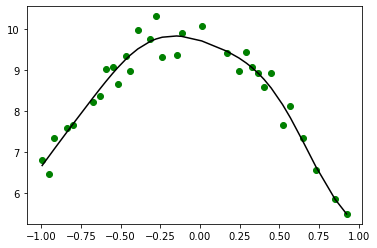

In [42]:
Y_model_normal = np.dot(X_train_t9 , final_normal_w_t9)

final_df_t9 = np.column_stack((X_train_t9,Y_model_normal))
final_df_t9 = np.column_stack((final_df_t9,Y_train))

final_df_t9 = final_df_t9[final_df_t9[:,0].astype(float).argsort()]

print(final_df_t9.shape)

X_train_sec= final_df_t9[:,0]
Y_model = final_df_t9[:,10]

y_train= final_df_t9[:,11]



plt.scatter(X_train_sec, y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

In [43]:
X_train_t11 = train.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_train.shape[0],1))
X1 = X_train_t11 ** 2
X2 = X_train_t11 ** 3
X3 = X_train_t11 ** 4
X4 = X_train_t11 ** 5
X5 = X_train_t11 ** 6
X6 = X_train_t11 ** 7
X7 = X_train_t11 ** 8
X8 = X_train_t11 ** 9
X9 = X_train_t11 ** 10
X10 = X_train_t11 ** 11

X_train_t11 = np.hstack((X_train_t11,X1))
X_train_t11 = np.column_stack((X_train_t11,X2))
X_train_t11 = np.column_stack((X_train_t11,X3))
X_train_t11 = np.column_stack((X_train_t11,X4))
X_train_t11 = np.column_stack((X_train_t11,X5))
X_train_t11 = np.column_stack((X_train_t11,X6))
X_train_t11 = np.column_stack((X_train_t11,X7))
X_train_t11 = np.column_stack((X_train_t11,X8))
X_train_t11 = np.column_stack((X_train_t11,X9))
X_train_t11 = np.column_stack((X_train_t11,X10))
X_train_t11 = np.column_stack((X_train_t11,X_bias))
print(X_train_t11)

[[-6.75040407e-01  4.55679551e-01 -3.07602110e-01  2.07643853e-01
  -1.40167991e-01  9.46190578e-02 -6.38716873e-02  4.31159698e-02
  -2.91050218e-02  1.96470658e-02 -1.32625633e-02  1.00000000e+00]
 [ 3.68648464e-01  1.35901690e-01  5.00999493e-02  1.84692693e-02
   6.80866778e-03  2.51000492e-03  9.25309457e-04  3.41113910e-04
   1.25751119e-04  4.63579569e-05  1.70897896e-05  1.00000000e+00]
 [-1.47896730e-01  2.18734427e-02 -3.23501066e-03  4.78447498e-04
  -7.07608204e-05  1.04652939e-05 -1.54778275e-06  2.28912008e-07
  -3.38553374e-08  5.00709370e-09 -7.40532785e-10  1.00000000e+00]
 [ 4.03943945e-01  1.63170711e-01  6.59118206e-02  2.66246808e-02
   1.07548786e-02  4.34436809e-03  1.75488119e-03  7.08873629e-04
   2.86345210e-04  1.15667414e-04  4.67231515e-05  1.00000000e+00]
 [ 2.91973619e-01  8.52485942e-02  2.48903406e-02  7.26732281e-03
   2.12186654e-03  6.19529053e-04  1.80886140e-04  5.28139808e-05
   1.54202891e-05  4.50231762e-06  1.31455797e-06  1.00000000e+00]
 [-8.

In [44]:
X_test_t11 = test.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_test_t11.shape[0],1))
X1 = X_test_t11 ** 2
X2 = X_test_t11 ** 3
X3 = X_test_t11 ** 4
X4 = X_test_t11 ** 5
X5 = X_test_t11 ** 6
X6 = X_test_t11 ** 7
X7 = X_test_t11 ** 8
X8 = X_test_t11 ** 9
X9 = X_test_t11 ** 10
X10 = X_test_t11 ** 11

X_test_t11 = np.hstack((X_test_t11,X1))
X_test_t11 = np.column_stack((X_test_t11,X2))
X_test_t11 = np.column_stack((X_test_t11,X3))
X_test_t11 = np.column_stack((X_test_t11,X4))
X_test_t11 = np.column_stack((X_test_t11,X5))
X_test_t11 = np.column_stack((X_test_t11,X6))
X_test_t11 = np.column_stack((X_test_t11,X7))
X_test_t11 = np.column_stack((X_test_t11,X8))
X_test_t11 = np.column_stack((X_test_t11,X9))
X_test_t11 = np.column_stack((X_test_t11,X10))
X_test_t11 = np.column_stack((X_test_t11,X_bias))
print(X_test_t11)

[[ 4.90432821e-01  2.40524352e-01  1.17961036e-01  5.78519639e-02
   2.83725018e-02  1.39148061e-02  6.82427762e-03  3.34684972e-03
   1.64140495e-03  8.04998861e-04  3.94797862e-04  1.00000000e+00]
 [-7.13459670e-02  5.09024701e-03 -3.63168595e-04  2.59106146e-05
  -1.84861785e-06  1.31891428e-07 -9.40992150e-09  6.71359949e-10
  -4.78988247e-11  3.41738797e-12 -2.43816849e-13  1.00000000e+00]
 [ 7.61290325e-01  5.79562959e-01  4.41215673e-01  3.35893223e-01
   2.55712261e-01  1.94671270e-01  1.48201355e-01  1.12824258e-01
   8.58920157e-02  6.53887605e-02  4.97798307e-02  1.00000000e+00]
 [ 6.83505550e-01  4.67179837e-01  3.19320011e-01  2.18257000e-01
   1.49179871e-01  1.01965270e-01  6.96938277e-02  4.76361180e-02
   3.25595511e-02  2.22546339e-02  1.52111658e-02  1.00000000e+00]
 [ 8.83670177e-01  7.80872982e-01  6.90034166e-01  6.09762614e-01
   5.38829037e-01  4.76147150e-01  4.20757037e-01  3.71810445e-01
   3.28557802e-01  2.90336731e-01  2.56561910e-01  1.00000000e+00]
 [-1.

In [45]:
final_normal_w_t11 = cal_normal_Equation(X_train_t11, Y_train)

final_train_cost_normal_t11 = calculate_cost_func(X_train_t11 , Y_train , final_normal_w_t11)
print(final_train_cost_normal_t11)

Y_model_test_t11 = np.dot(X_test_t11 , final_normal_w_t11)
final_test_cost_normal_t11 = calculate_cost_func(X_test_t11 , Y_test , final_normal_w_t11)
print(final_test_cost_normal_t11)

0.03854415824494832
0.05205143780111919


(32, 14)


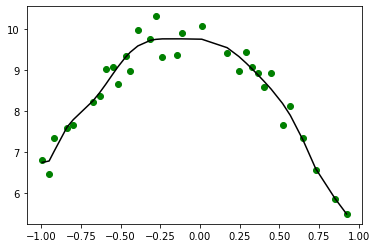

In [46]:
Y_model_normal = np.dot(X_train_t11 , final_normal_w_t11)

final_df_t11 = np.column_stack((X_train_t11,Y_model_normal))
final_df_t11 = np.column_stack((final_df_t11,Y_train))

final_df_t11 = final_df_t11[final_df_t11[:,0].astype(float).argsort()]

print(final_df_t11.shape)

X_train_sec= final_df_t11[:,0]
Y_model = final_df_t11[:,12]

y_train= final_df_t11[:,13]



plt.scatter(X_train_sec, y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

In [47]:
X_train_t13 = train.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_train.shape[0],1))
X1 = X_train_t13 ** 2
X2 = X_train_t13 ** 3
X3 = X_train_t13 ** 4
X4 = X_train_t13 ** 5
X5 = X_train_t13 ** 6
X6 = X_train_t13 ** 7
X7 = X_train_t13 ** 8
X8 = X_train_t13 ** 9
X9 = X_train_t13 ** 10
X10 = X_train_t13 ** 11
X11 = X_train_t13 ** 12
X12 = X_train_t13 ** 13

X_train_t13 = np.hstack((X_train_t13,X1))
X_train_t13 = np.column_stack((X_train_t13,X2))
X_train_t13 = np.column_stack((X_train_t13,X3))
X_train_t13 = np.column_stack((X_train_t13,X4))
X_train_t13 = np.column_stack((X_train_t13,X5))
X_train_t13 = np.column_stack((X_train_t13,X6))
X_train_t13 = np.column_stack((X_train_t13,X7))
X_train_t13 = np.column_stack((X_train_t13,X8))
X_train_t13 = np.column_stack((X_train_t13,X9))
X_train_t13 = np.column_stack((X_train_t13,X10))
X_train_t13 = np.column_stack((X_train_t13,X11))
X_train_t13 = np.column_stack((X_train_t13,X12))
X_train_t13 = np.column_stack((X_train_t13,X_bias))
print(X_train_t13)

[[-6.75040407e-01  4.55679551e-01 -3.07602110e-01  2.07643853e-01
  -1.40167991e-01  9.46190578e-02 -6.38716873e-02  4.31159698e-02
  -2.91050218e-02  1.96470658e-02 -1.32625633e-02  8.95276611e-03
  -6.04347888e-03  1.00000000e+00]
 [ 3.68648464e-01  1.35901690e-01  5.00999493e-02  1.84692693e-02
   6.80866778e-03  2.51000492e-03  9.25309457e-04  3.41113910e-04
   1.25751119e-04  4.63579569e-05  1.70897896e-05  6.30012469e-06
   2.32253129e-06  1.00000000e+00]
 [-1.47896730e-01  2.18734427e-02 -3.23501066e-03  4.78447498e-04
  -7.07608204e-05  1.04652939e-05 -1.54778275e-06  2.28912008e-07
  -3.38553374e-08  5.00709370e-09 -7.40532785e-10  1.09522377e-10
  -1.61980015e-11  1.00000000e+00]
 [ 4.03943945e-01  1.63170711e-01  6.59118206e-02  2.66246808e-02
   1.07548786e-02  4.34436809e-03  1.75488119e-03  7.08873629e-04
   2.86345210e-04  1.15667414e-04  4.67231515e-05  1.88735341e-05
   7.62384983e-06  1.00000000e+00]
 [ 2.91973619e-01  8.52485942e-02  2.48903406e-02  7.26732281e-03
  

In [48]:
X_test_t13 = test.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_test_t13.shape[0],1))
X1 = X_test_t13 ** 2
X2 = X_test_t13 ** 3
X3 = X_test_t13 ** 4
X4 = X_test_t13 ** 5
X5 = X_test_t13 ** 6
X6 = X_test_t13 ** 7
X7 = X_test_t13 ** 8
X8 = X_test_t13 ** 9
X9 = X_test_t13 ** 10
X10 = X_test_t13 ** 11
X11 = X_test_t13 ** 12
X12 = X_test_t13 ** 13

X_test_t13 = np.hstack((X_test_t13,X1))
X_test_t13 = np.column_stack((X_test_t13,X2))
X_test_t13 = np.column_stack((X_test_t13,X3))
X_test_t13 = np.column_stack((X_test_t13,X4))
X_test_t13 = np.column_stack((X_test_t13,X5))
X_test_t13 = np.column_stack((X_test_t13,X6))
X_test_t13 = np.column_stack((X_test_t13,X7))
X_test_t13 = np.column_stack((X_test_t13,X8))
X_test_t13 = np.column_stack((X_test_t13,X9))
X_test_t13 = np.column_stack((X_test_t13,X10))
X_test_t13 = np.column_stack((X_test_t13,X11))
X_test_t13 = np.column_stack((X_test_t13,X12))
X_test_t13 = np.column_stack((X_test_t13,X_bias))
print(X_test_t13)

[[ 4.90432821e-01  2.40524352e-01  1.17961036e-01  5.78519639e-02
   2.83725018e-02  1.39148061e-02  6.82427762e-03  3.34684972e-03
   1.64140495e-03  8.04998861e-04  3.94797862e-04  1.93621829e-04
   9.49584999e-05  1.00000000e+00]
 [-7.13459670e-02  5.09024701e-03 -3.63168595e-04  2.59106146e-05
  -1.84861785e-06  1.31891428e-07 -9.40992150e-09  6.71359949e-10
  -4.78988247e-11  3.41738797e-12 -2.43816849e-13  1.73953489e-14
  -1.24108799e-15  1.00000000e+00]
 [ 7.61290325e-01  5.79562959e-01  4.41215673e-01  3.35893223e-01
   2.55712261e-01  1.94671270e-01  1.48201355e-01  1.12824258e-01
   8.58920157e-02  6.53887605e-02  4.97798307e-02  3.78969035e-02
   2.88505460e-02  1.00000000e+00]
 [ 6.83505550e-01  4.67179837e-01  3.19320011e-01  2.18257000e-01
   1.49179871e-01  1.01965270e-01  6.96938277e-02  4.76361180e-02
   3.25595511e-02  2.22546339e-02  1.52111658e-02  1.03969162e-02
   7.10634994e-03  1.00000000e+00]
 [ 8.83670177e-01  7.80872982e-01  6.90034166e-01  6.09762614e-01
  

In [49]:
final_normal_w_t13 = cal_normal_Equation(X_train_t13, Y_train)

final_train_cost_normal_t13 = calculate_cost_func(X_train_t13 , Y_train , final_normal_w_t13)
print(final_train_cost_normal_t13)

Y_model_test_t13 = np.dot(X_test_t13 , final_normal_w_t13)
final_test_cost_normal_t13 = calculate_cost_func(X_test_t13 , Y_test , final_normal_w_t13)
print(final_test_cost_normal_t13)

0.038362173822742256
0.053327246234044653


(32, 16)


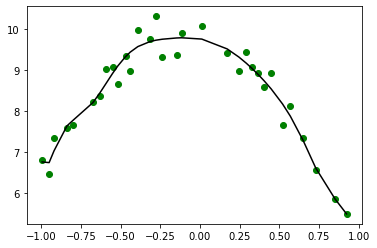

In [50]:
Y_model_normal = np.dot(X_train_t13 , final_normal_w_t13)

final_df_t13 = np.column_stack((X_train_t13,Y_model_normal))
final_df_t13 = np.column_stack((final_df_t13,Y_train))

final_df_t13 = final_df_t13[final_df_t13[:,0].astype(float).argsort()]

print(final_df_t13.shape)

X_train_sec= final_df_t13[:,0]
Y_model = final_df_t13[:,14]

y_train= final_df_t13[:,15]



plt.scatter(X_train_sec, y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

In [51]:
X_train_t15 = train.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_train.shape[0],1))
X1 = X_train_t15 ** 2
X2 = X_train_t15 ** 3
X3 = X_train_t15 ** 4
X4 = X_train_t15 ** 5
X5 = X_train_t15 ** 6
X6 = X_train_t15 ** 7
X7 = X_train_t15 ** 8
X8 = X_train_t15 ** 9
X9 = X_train_t15 ** 10
X10 = X_train_t15 ** 11
X11 = X_train_t15 ** 12
X12 = X_train_t15 ** 13
X13 = X_train_t15 ** 14
X14 = X_train_t15 ** 15

X_train_t15 = np.hstack((X_train_t15,X1))
X_train_t15 = np.column_stack((X_train_t15,X2))
X_train_t15 = np.column_stack((X_train_t15,X3))
X_train_t15 = np.column_stack((X_train_t15,X4))
X_train_t15 = np.column_stack((X_train_t15,X5))
X_train_t15 = np.column_stack((X_train_t15,X6))
X_train_t15 = np.column_stack((X_train_t15,X7))
X_train_t15 = np.column_stack((X_train_t15,X8))
X_train_t15 = np.column_stack((X_train_t15,X9))
X_train_t15 = np.column_stack((X_train_t15,X10))
X_train_t15 = np.column_stack((X_train_t15,X11))
X_train_t15 = np.column_stack((X_train_t15,X12))
X_train_t15 = np.column_stack((X_train_t15,X13))
X_train_t15 = np.column_stack((X_train_t15,X14))
X_train_t15 = np.column_stack((X_train_t15,X_bias))
print(X_train_t15)

[[-6.75040407e-01  4.55679551e-01 -3.07602110e-01  2.07643853e-01
  -1.40167991e-01  9.46190578e-02 -6.38716873e-02  4.31159698e-02
  -2.91050218e-02  1.96470658e-02 -1.32625633e-02  8.95276611e-03
  -6.04347888e-03  4.07959244e-03 -2.75388974e-03  1.00000000e+00]
 [ 3.68648464e-01  1.35901690e-01  5.00999493e-02  1.84692693e-02
   6.80866778e-03  2.51000492e-03  9.25309457e-04  3.41113910e-04
   1.25751119e-04  4.63579569e-05  1.70897896e-05  6.30012469e-06
   2.32253129e-06  8.56197592e-07  3.15635927e-07  1.00000000e+00]
 [-1.47896730e-01  2.18734427e-02 -3.23501066e-03  4.78447498e-04
  -7.07608204e-05  1.04652939e-05 -1.54778275e-06  2.28912008e-07
  -3.38553374e-08  5.00709370e-09 -7.40532785e-10  1.09522377e-10
  -1.61980015e-11  2.39563145e-12 -3.54306058e-13  1.00000000e+00]
 [ 4.03943945e-01  1.63170711e-01  6.59118206e-02  2.66246808e-02
   1.07548786e-02  4.34436809e-03  1.75488119e-03  7.08873629e-04
   2.86345210e-04  1.15667414e-04  4.67231515e-05  1.88735341e-05
   7.62

In [52]:
X_test_t15 = test.drop(columns=['Y']).to_numpy()
X_bias = np.ones((X_test_t15.shape[0],1))
X1 = X_test_t15 ** 2
X2 = X_test_t15 ** 3
X3 = X_test_t15 ** 4
X4 = X_test_t15 ** 5
X5 = X_test_t15 ** 6
X6 = X_test_t15 ** 7
X7 = X_test_t15 ** 8
X8 = X_test_t15 ** 9
X9 = X_test_t15 ** 10
X10 = X_test_t15 ** 11
X11 = X_test_t15 ** 12
X12 = X_test_t15 ** 13
X13 = X_test_t15 ** 14
X14 = X_test_t15 ** 15

X_test_t15 = np.hstack((X_test_t15,X1))
X_test_t15 = np.column_stack((X_test_t15,X2))
X_test_t15 = np.column_stack((X_test_t15,X3))
X_test_t15 = np.column_stack((X_test_t15,X4))
X_test_t15 = np.column_stack((X_test_t15,X5))
X_test_t15 = np.column_stack((X_test_t15,X6))
X_test_t15 = np.column_stack((X_test_t15,X7))
X_test_t15 = np.column_stack((X_test_t15,X8))
X_test_t15 = np.column_stack((X_test_t15,X9))
X_test_t15 = np.column_stack((X_test_t15,X10))
X_test_t15 = np.column_stack((X_test_t15,X11))
X_test_t15 = np.column_stack((X_test_t15,X12))
X_test_t15 = np.column_stack((X_test_t15,X13))
X_test_t15 = np.column_stack((X_test_t15,X14))
X_test_t15 = np.column_stack((X_test_t15,X_bias))
print(X_test_t15)

[[ 4.90432821e-01  2.40524352e-01  1.17961036e-01  5.78519639e-02
   2.83725018e-02  1.39148061e-02  6.82427762e-03  3.34684972e-03
   1.64140495e-03  8.04998861e-04  3.94797862e-04  1.93621829e-04
   9.49584999e-05  4.65707650e-05  2.28398317e-05  1.00000000e+00]
 [-7.13459670e-02  5.09024701e-03 -3.63168595e-04  2.59106146e-05
  -1.84861785e-06  1.31891428e-07 -9.40992150e-09  6.71359949e-10
  -4.78988247e-11  3.41738797e-12 -2.43816849e-13  1.73953489e-14
  -1.24108799e-15  8.85466226e-17 -6.31744441e-18  1.00000000e+00]
 [ 7.61290325e-01  5.79562959e-01  4.41215673e-01  3.35893223e-01
   2.55712261e-01  1.94671270e-01  1.48201355e-01  1.12824258e-01
   8.58920157e-02  6.53887605e-02  4.97798307e-02  3.78969035e-02
   2.88505460e-02  2.19636415e-02  1.67207078e-02  1.00000000e+00]
 [ 6.83505550e-01  4.67179837e-01  3.19320011e-01  2.18257000e-01
   1.49179871e-01  1.01965270e-01  6.96938277e-02  4.76361180e-02
   3.25595511e-02  2.22546339e-02  1.52111658e-02  1.03969162e-02
   7.10

In [53]:
final_normal_w_t15 = cal_normal_Equation(X_train_t15, Y_train)

final_train_cost_normal_t15 = calculate_cost_func(X_train_t15 , Y_train , final_normal_w_t15)
print(final_train_cost_normal_t15)

Y_model_test_t15 = np.dot(X_test_t15 , final_normal_w_t15)
final_test_cost_normal_t15 = calculate_cost_func(X_test_t15 , Y_test , final_normal_w_t15)
print(final_test_cost_normal_t15)

0.028996152560827923
0.17127150102660166


(32, 18)


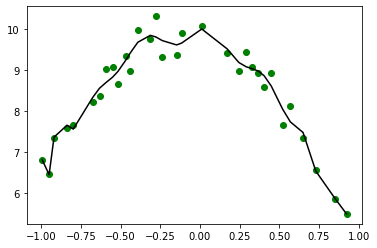

In [54]:
Y_model_normal = np.dot(X_train_t15 , final_normal_w_t15)

final_df_t15 = np.column_stack((X_train_t15,Y_model_normal))
final_df_t15 = np.column_stack((final_df_t15,Y_train))

final_df_t15 = final_df_t15[final_df_t15[:,0].astype(float).argsort()]

print(final_df_t15.shape)

X_train_sec= final_df_t15[:,0]
Y_model = final_df_t15[:,16]

y_train= final_df_t15[:,17]



plt.scatter(X_train_sec, y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

q1_part_e

In [57]:
def cal_ridge(Xp , y, alpha):
    w = np.linalg.inv(Xp.T.dot(Xp) + alpha * np.eye(Xp.shape[1])).dot(Xp.T).dot(y)
    return w

In [86]:
final_ridge_w = cal_ridge(X_train, Y_train , 0.1)

final_train_cost_ridge = calculate_cost_func(X_train , Y_train , final_ridge_w)
print(final_train_cost_ridge)

Y_model_test_ridge = np.dot(X_test , final_ridge_w)
final_test_cost_ridge = calculate_cost_func(X_test , Y_test , final_ridge_w)
print(final_test_cost_ridge)

0.7468916425484682
0.6778740926515089


[-0.67504041  0.36864846 -0.14789673  0.40394395  0.29197362 -0.83816555
 -0.43965765  0.01118258 -0.91999857 -0.23752373 -0.51744435 -0.39161916
  0.32666457 -0.46902353 -0.31301638 -0.59476007  0.64935207  0.72986599
 -0.95099594  0.44858126 -0.63326479 -0.27824516  0.5202286  -0.1160822
  0.17097678  0.85135744 -0.55143476  0.92359719  0.5693768  -0.79884577
 -0.99478723  0.24526385]


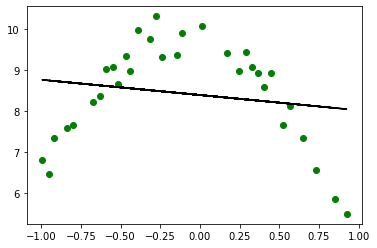

In [87]:
Y_model_ridge = np.dot(X_train , final_ridge_w)

X_train_sec = X_train[:,0]
print(X_train_sec)
plt.scatter(X_train_sec, Y_train,color='g')
plt.plot(X_train_sec, Y_model_ridge,color='k')

In [84]:
final_ridge_w_t13 = cal_ridge(X_train_t13, Y_train, 0.1)

final_train_cost_ridge_t13 = calculate_cost_func(X_train_t13 , Y_train , final_ridge_w_t13)
print(final_train_cost_ridge_t13)

Y_model_test_t13 = np.dot(X_test_t13 , final_ridge_w_t13)
final_test_cost_ridge_t13 = calculate_cost_func(X_test_t13 , Y_test , final_ridge_w_t13)
print(final_test_cost_ridge_t13)

0.04906594959518419
0.037313880842272704


(32, 16)


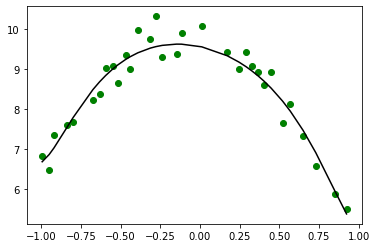

In [85]:
Y_model_ridge = np.dot(X_train_t13 , final_ridge_w_t13)

ridge_df_t13 = np.column_stack((X_train_t13,Y_model_ridge))
ridge_df_t13 = np.column_stack((ridge_df_t13,Y_train))

ridge_df_t13 = ridge_df_t13[ridge_df_t13[:,0].astype(float).argsort()]

print(ridge_df_t13.shape)

X_train_sec= ridge_df_t13[:,0]
Y_model = ridge_df_t13[:,14]

y_train= ridge_df_t13[:,15]



plt.scatter(X_train_sec, y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

In [82]:
final_ridge_w_t15 = cal_ridge(X_train_t15, Y_train , 0.1)

final_train_cost_ridge_t15 = calculate_cost_func(X_train_t15 , Y_train , final_ridge_w_t15)
print(final_train_cost_ridge_t15)

Y_model_test_t15 = np.dot(X_test_t15 , final_ridge_w_t15)
final_test_cost_ridge_t15 = calculate_cost_func(X_test_t15 , Y_test , final_ridge_w_t15)
print(final_test_cost_ridge_t15)

0.04897778132428582
0.03805453910309131


(32, 18)


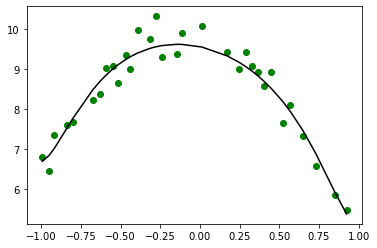

In [83]:
Y_model_ridge = np.dot(X_train_t15 , final_ridge_w_t15)

ridge_df_t15 = np.column_stack((X_train_t15,Y_model_ridge))
ridge_df_t15 = np.column_stack((ridge_df_t15,Y_train))

ridge_df_t15 = ridge_df_t15[ridge_df_t15[:,0].astype(float).argsort()]

print(ridge_df_t15.shape)

X_train_sec= ridge_df_t15[:,0]
Y_model = ridge_df_t15[:,16]

y_train= ridge_df_t15[:,17]



plt.scatter(X_train_sec, y_train,color='g')
plt.plot(X_train_sec, Y_model,color='k')

q1_part_F

In [94]:
from sklearn.linear_model import Lasso

In [95]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_t13, Y_train) 
print(f"weights(sklearn): {model_lasso.coef_}")

weights(sklearn): [-0.86577882 -4.08412143 -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.        ]


In [96]:
print(final_ridge_w_t13)

[[-8.36396899e-01]
 [-2.97936669e+00]
 [-9.47005375e-02]
 [-1.45742579e+00]
 [-2.25156392e-02]
 [-3.61830478e-01]
 [ 1.65494567e-02]
 [ 1.59437173e-01]
 [ 3.71226682e-02]
 [ 3.90335866e-01]
 [ 3.34349613e-02]
 [ 4.89143703e-01]
 [ 9.17057482e-03]
 [ 9.56472830e+00]]


In [97]:
print(final_normal_w_t13)

[[  -0.61356122]
 [  -4.25007031]
 [  -5.86928559]
 [  10.24180833]
 [  23.2167269 ]
 [ -65.13623244]
 [  13.35616076]
 [ 126.87854385]
 [-189.03383565]
 [ -91.01687789]
 [ 290.8982935 ]
 [  18.17823279]
 [-134.12904024]
 [   9.77039038]]


In [98]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_t15, Y_train) 
print(f"weights(sklearn): {model_lasso.coef_}")

weights(sklearn): [-0.86577882 -4.08412143 -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.        ]


In [99]:
print(final_ridge_w_t15)

[[-8.30707624e-01]
 [-2.95706900e+00]
 [-1.12898975e-01]
 [-1.45771196e+00]
 [-4.37924744e-02]
 [-3.99962159e-01]
 [ 8.14733083e-03]
 [ 8.85537810e-02]
 [ 4.70905042e-02]
 [ 2.94542994e-01]
 [ 6.24693075e-02]
 [ 3.75125090e-01]
 [ 5.60714808e-02]
 [ 4.02685849e-01]
 [ 3.33284035e-02]
 [ 9.56278374e+00]]


In [100]:
print(final_normal_w_t15)

[[ 1.80019779e+00]
 [-2.35856698e+01]
 [-1.01172088e+02]
 [ 3.94002344e+02]
 [ 1.21910503e+03]
 [-3.05145334e+03]
 [-6.91135184e+03]
 [ 1.12499154e+04]
 [ 2.08627893e+04]
 [-2.12275751e+04]
 [-3.43147271e+04]
 [ 1.97307726e+04]
 [ 2.88901591e+04]
 [-7.14101847e+03]
 [-9.71299729e+03]
 [ 9.99199204e+00]]
